In [1]:
import sys

sys.path.append("..")

# Teoria: Analiza Reszt w Modelu Regresji Liniowej  
### Reszty w Modelu Regresji  
Reszty $ e_i $ to różnice między wartościami rzeczywistymi $ Y_i $ a wartościami przewidywanymi $ \hat{Y}_i $:  

$$
e_i = Y_i - \hat{Y}_i
$$

Analiza reszt jest kluczowa do oceny poprawności modelu regresji. Jeśli model spełnia założenia klasycznego modelu regresji liniowej, reszty powinny mieć określone właściwości.

---

### Właściwości Reszt w Modelu Klasycznej Regresji Liniowej  
Aby model był statystycznie poprawny, reszty powinny spełniać następujące założenia:  

1. Średnia reszt powinna być równa zeru:  

   $$
   E(e_i) = 0
   $$

   Oznacza to, że model nie ma systematycznych błędów w przewidywaniu wartości zmiennej zależnej.  

2. Homoskedastyczność (stała wariancja reszt):  

   $$
   \text{Var}(e_i) = \sigma^2
   $$

   Wariancja reszt nie powinna zależeć od wartości zmiennej niezależnej $ X $. Jeśli wariancja reszt zmienia się w funkcji $ X $, mamy do czynienia z heteroskedastycznością.  

3. Brak autokorelacji reszt:  

   $$
   \text{Cov}(e_i, e_j) = 0, \quad \text{dla } i \neq j
   $$

   Oznacza to, że wartości reszt nie powinny być ze sobą skorelowane, ponieważ ich korelacja może wskazywać na brak istotnych zmiennych w modelu.  

4. Normalność rozkładu reszt:  

   $$
   e_i \sim N(0, \sigma^2)
   $$

   Założenie to jest kluczowe w kontekście testów istotności współczynników regresji oraz budowy przedziałów ufności.

---

### * Testowanie Normalności Rozkładu Reszt  
Aby sprawdzić, czy reszty pochodzą z rozkładu normalnego, stosujemy różne testy statystyczne:  

####  Test Kolmogorowa-Smirnowa (KS Test)  
Test Kolmogorowa-Smirnowa sprawdza, czy rozkład empiryczny próbki (reszt) jest zgodny z rozkładem teoretycznym (tu: normalnym).  
Statystyka testowa jest definiowana jako:  

$$
D = \sup_x |F_n(x) - F_0(x)|
$$

gdzie:  
- $ F_n(x) $ – dystrybuanta empiryczna,  
- $ F_0(x) $ – dystrybuanta rozkładu normalnego.  

Hipoteza zerowa:  
$$
H_0: e_i \sim N(0, \sigma^2)
$$  
Hipoteza alternatywna:  
$$
H_1: e_i \text{ nie są z rozkładu normalnego}
$$  

Jeśli wartość p-testu $ p < \alpha $, odrzucamy hipotezę o normalności reszt.  

#### Test Jarque-Bera (JB Test)  
Test Jarque-Bera bada normalność reszt na podstawie dwóch momentów statystycznych: skośności ($ S $) i kurtozy ($ K $):  

$$
JB = \frac{n}{6} \left( S^2 + \frac{(K - 3)^2}{4} \right)
$$

gdzie:  
- $ S $ – skośność, określająca asymetrię rozkładu,  
- $ K $ – kurtoza, mierząca "spiczastość" rozkładu.  

Hipoteza zerowa:  
$$
H_0: e_i \sim N(0, \sigma^2)
$$  
Hipoteza alternatywna:  
$$
H_1: e_i \text{ nie mają rozkładu normalnego}
$$  

Duża wartość statystyki JB sugeruje odchylenie od normalności.

---

###  Autokorelacja Reszt  
Jeśli reszty są skorelowane, oznacza to, że model nie uwzględnił pewnych istotnych zależności w danych. Autokorelacja może być badana za pomocą funkcji autokorelacji (ACF – Autocorrelation Function).  

####  Funkcja Autokorelacji (ACF)  
Funkcja autokorelacji opisuje zależność między wartościami reszt oddalonymi o określoną liczbę opóźnień (lag):  

$$
\rho_k = \frac{\sum_{i=1}^{n-k} (e_i - \bar{e})(e_{i+k} - \bar{e})}{\sum_{i=1}^{n} (e_i - \bar{e})^2}
$$

Jeśli wartości autokorelacji są istotnie różne od zera, sugeruje to obecność zależności między resztami.  

---

### 6. Podsumowanie  
Analiza reszt jest kluczowym elementem oceny poprawności modelu regresji liniowej. Kluczowe aspekty to:  

1. Normalność reszt – sprawdzana za pomocą testu Kolmogorowa-Smirnowa oraz testu Jarque-Bera.  
2. Brak autokorelacji reszt – sprawdzany za pomocą funkcji autokorelacji.  
3. Brak heteroskedastyczności – reszty powinny mieć stałą wariancję.  

Jeśli któreś z tych założeń są naruszone, model może wymagać poprawy, np. poprzez dodanie nowych zmiennych, transformację danych lub zastosowanie innej metody estymacji.

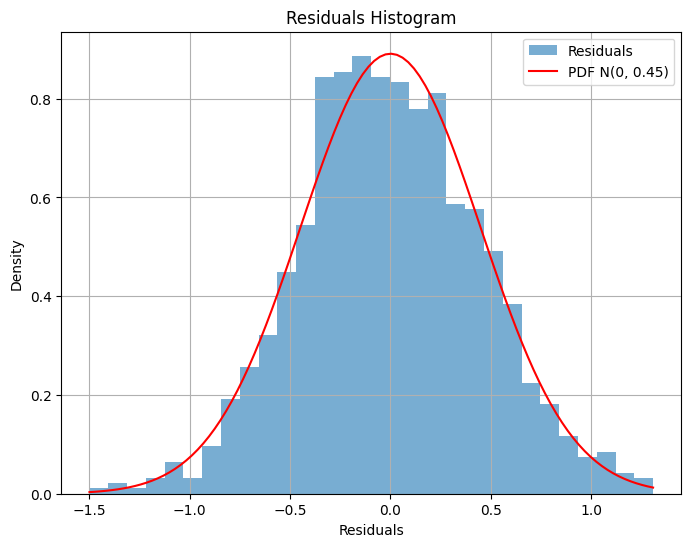

Residual Mean: -0.0000
Residual Standard Deviation: 0.4478

Statistical Tests on Residuals:
Kolmogorov-Smirnov Test: Statistic=0.0259, p-value=0.5065
Jarque-Bera Test: Statistic=0.3643, p-value=0.8335


<Figure size 800x600 with 0 Axes>

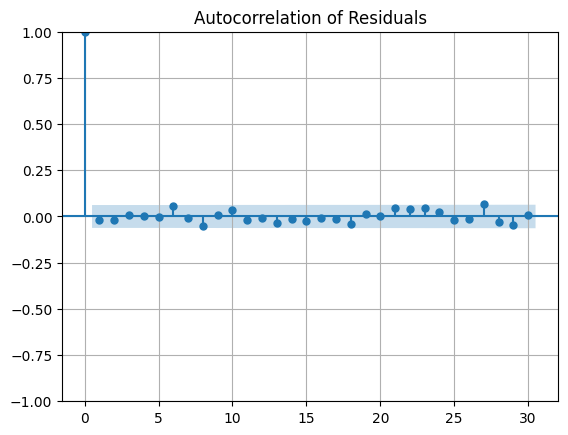

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm, kstest, jarque_bera
from statsmodels.graphics.tsaplots import plot_acf
from src.functions import estimate_coefficients

# Load and preprocess data
data = np.loadtxt("../data/set_3/dane1.txt")
data = data[np.argsort(data[:, 1])]  # Sort data by the second column (x values)

# Extract x and y values
x = data[:, 1]
y = data[:, 0]

# Estimate linear model coefficients
b0, b1 = estimate_coefficients(x, y)
predicted_y = b0 + b1 * x

# Calculate residuals
residuals = y - predicted_y
residual_mean = np.mean(residuals)
residual_std = np.std(residuals)

# Plot histogram of residuals with fitted normal distribution
plt.figure(figsize=(8, 6))
plt.hist(residuals, bins=30, density=True, alpha=0.6, label="Residuals")
x_range = np.linspace(min(residuals), max(residuals), 100)
plt.plot(
    x_range,
    norm.pdf(x_range, residual_mean, residual_std),
    label=f"PDF N(0, {residual_std:.2f})",
    color="red",
)
plt.title("Residuals Histogram")
plt.xlabel("Residuals")
plt.ylabel("Density")
plt.legend()
plt.grid(True)
plt.show()

# Print residual statistics
print(f"Residual Mean: {residual_mean:.4f}")
print(f"Residual Standard Deviation: {residual_std:.4f}")

# Perform statistical tests on residuals
kstest_result = kstest(residuals, "norm", args=(residual_mean, residual_std))
jarque_bera_result = jarque_bera((residuals - residual_mean) / residual_std)

print("\nStatistical Tests on Residuals:")
print(
    f"Kolmogorov-Smirnov Test: Statistic={kstest_result.statistic:.4f}, p-value={kstest_result.pvalue:.4f}"
)
print(
    f"Jarque-Bera Test: Statistic={jarque_bera_result[0]:.4f}, p-value={jarque_bera_result[1]:.4f}"
)

# Plot autocorrelation of residuals
plt.figure(figsize=(8, 6))
plot_acf(residuals, title="Autocorrelation of Residuals")
plt.grid(True)
plt.show()

# **Zadanie: Analiza Dopasowania Modeli Regresji oraz Analiza Reszt**  

1. **Regresja liniowa** – zakłada liniową zależność pomiędzy zmiennymi:  
   $$
   Y = \beta_0 + \beta_1 X + \varepsilon
   $$  
   gdzie:  
   - $ \beta_0 $ – wyraz wolny,  
   - $ \beta_1 $ – współczynnik kierunkowy,  
   - $ \varepsilon $ – składnik losowy (reszta).  

2. **Regresja kwadratowa** – rozszerza model liniowy o składnik kwadratowy:  
   $$
   Y = \beta_0 + \beta_1 X + \beta_2 X^2 + \varepsilon
   $$  
   Dzięki temu model może lepiej odwzorowywać nieliniowe zależności.  

Po dopasowaniu obu modeli do danych ocenimy ich jakość przy pomocy **współczynnika determinacji $ R^2 $** oraz przeanalizujemy reszty.  

## **1. Dopasowanie modelu regresji**  
W pierwszej części zadania:  
- Dopasujemy model regresji liniowej oraz kwadratowej do danych,  
- Obliczymy wartość współczynnika determinacji $ R^2 $, który mierzy, jaka część zmienności zmiennej zależnej jest wyjaśniana przez model:  
  $$
  R^2 = 1 - \frac{\sum (Y_i - \hat{Y}_i)^2}{\sum (Y_i - \bar{Y})^2}
  $$  
  gdzie $ \bar{Y} $ to średnia wartość $ Y $.  
- Przedstawimy dopasowane modele graficznie.


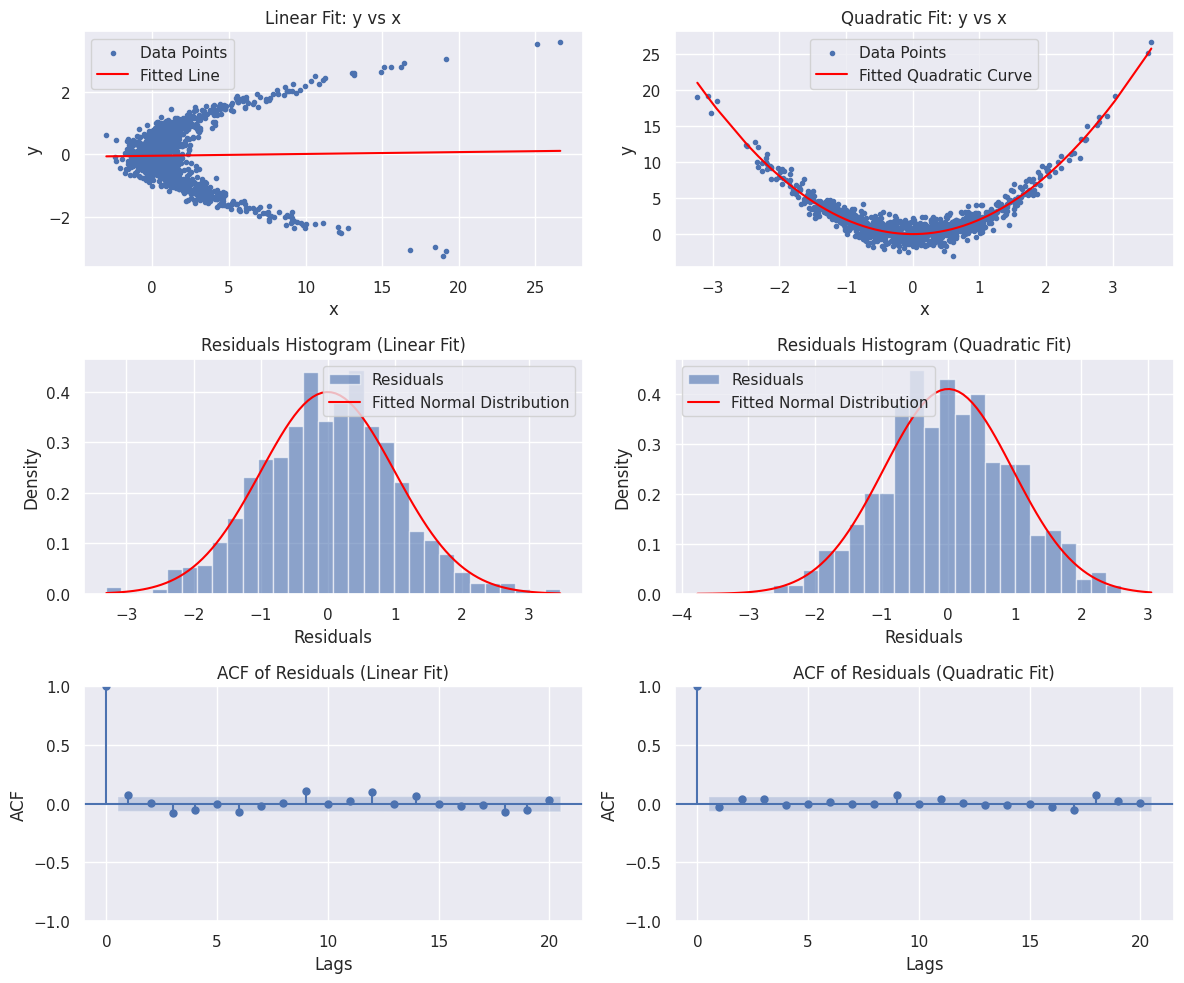

Linear Fit R-squared: 0.0004
Kolmogorov-Smirnov Test (Linear): Statistic=0.0200, p-value=0.8132
Jarque-Bera Test (Linear): Statistic=2.4454, p-value=0.2944
Quadratic Fit R-squared: 0.9060
Kolmogorov-Smirnov Test (Quadratic): Statistic=0.0253, p-value=0.5373
Jarque-Bera Test (Quadratic): Statistic=0.0143, p-value=0.9929


In [3]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import kstest, jarque_bera, norm
from statsmodels.graphics.tsaplots import plot_acf
from src.functions import estimate_coefficients, calculate_r_squared

sns.set()


# Load and preprocess data
data = np.loadtxt("../data/set_3/dane3.txt")

# Sort data by the second column (x values)
data = data[np.argsort(data[:, 1])]

# Extract x and y values
x = data[:, 1]
y = data[:, 0]

# Linear regression analysis
intercept, slope = estimate_coefficients(x, y)
predicted_y = intercept + slope * x
residuals = y - predicted_y
r_squared = calculate_r_squared(y, predicted_y)

# Quadratic regression analysis
data = data[np.argsort(data[:, 0])]  # Sort data by the first column (x values)
x_quad = data[:, 0]
y_quad = data[:, 1]

quadratic_coeffs = np.polyfit(x_quad, y_quad, 2)
quadratic_fit = np.polyval(quadratic_coeffs, x_quad)
residuals_quad = y_quad - quadratic_fit
r_squared_quad = calculate_r_squared(y_quad, quadratic_fit)

# Plotting results in a single figure
fig, axs = plt.subplots(3, 2, figsize=(12, 10))

# Linear regression scatter plot with fitted line
axs[0, 0].scatter(x, y, marker=".", label="Data Points")
axs[0, 0].plot(x, predicted_y, color="red", label="Fitted Line")
axs[0, 0].set_title("Linear Fit: y vs x")
axs[0, 0].set_xlabel("x")
axs[0, 0].set_ylabel("y")
axs[0, 0].legend()
axs[0, 0].grid(True)

# Quadratic regression scatter plot with fitted curve
axs[0, 1].scatter(x_quad, y_quad, marker=".", label="Data Points")
axs[0, 1].plot(x_quad, quadratic_fit, color="red", label="Fitted Quadratic Curve")
axs[0, 1].set_title("Quadratic Fit: y vs x")
axs[0, 1].set_xlabel("x")
axs[0, 1].set_ylabel("y")
axs[0, 1].legend()
axs[0, 1].grid(True)

# Residuals histogram for linear regression
axs[1, 0].hist(residuals, bins=30, density=True, alpha=0.6, label="Residuals")
x_range = np.linspace(min(residuals), max(residuals), 100)
axs[1, 0].plot(
    x_range,
    norm.pdf(x_range, np.mean(residuals), np.std(residuals)),
    label="Fitted Normal Distribution",
    color="red",
)
axs[1, 0].set_title("Residuals Histogram (Linear Fit)")
axs[1, 0].set_xlabel("Residuals")
axs[1, 0].set_ylabel("Density")
axs[1, 0].legend()
axs[1, 0].grid(True)

# Residuals histogram for quadratic regression
axs[1, 1].hist(residuals_quad, bins=30, density=True, alpha=0.6, label="Residuals")
x_range_quad = np.linspace(min(residuals_quad), max(residuals_quad), 100)
axs[1, 1].plot(
    x_range_quad,
    norm.pdf(x_range_quad, np.mean(residuals_quad), np.std(residuals_quad)),
    label="Fitted Normal Distribution",
    color="red",
)
axs[1, 1].set_title("Residuals Histogram (Quadratic Fit)")
axs[1, 1].set_xlabel("Residuals")
axs[1, 1].set_ylabel("Density")
axs[1, 1].legend()
axs[1, 1].grid(True)

plot_acf(residuals, lags=20, ax=axs[2, 0])
axs[2, 0].set_title("ACF of Residuals (Linear Fit)")
plot_acf(residuals_quad, lags=20, ax=axs[2, 1])
axs[2, 1].set_title("ACF of Residuals (Quadratic Fit)")
axs[2, 0].set_xlabel("Lags")
axs[2, 1].set_xlabel("Lags")
axs[2, 0].set_ylabel("ACF")
axs[2, 1].set_ylabel("ACF")


plt.tight_layout()
plt.show()

# Statistical tests for residuals
ks_test_result_linear = kstest(
    residuals, "norm", args=(np.mean(residuals), np.std(residuals))
)
jb_test_result_linear = jarque_bera(residuals)
ks_test_result_quad = kstest(
    residuals_quad, "norm", args=(np.mean(residuals_quad), np.std(residuals_quad))
)
jb_test_result_quad = jarque_bera(residuals_quad)

# Print results
print(f"Linear Fit R-squared: {r_squared:.4f}")
print(
    f"Kolmogorov-Smirnov Test (Linear): Statistic={ks_test_result_linear.statistic:.4f}, p-value={ks_test_result_linear.pvalue:.4f}"
)
print(
    f"Jarque-Bera Test (Linear): Statistic={jb_test_result_linear[0]:.4f}, p-value={jb_test_result_linear[1]:.4f}"
)
print(f"Quadratic Fit R-squared: {r_squared_quad:.4f}")
print(
    f"Kolmogorov-Smirnov Test (Quadratic): Statistic={ks_test_result_quad.statistic:.4f}, p-value={ks_test_result_quad.pvalue:.4f}"
)
print(
    f"Jarque-Bera Test (Quadratic): Statistic={jb_test_result_quad[0]:.4f}, p-value={jb_test_result_quad[1]:.4f}"
)

Fitted parameters for sinusoidal component: [2.96563221 0.00400023]


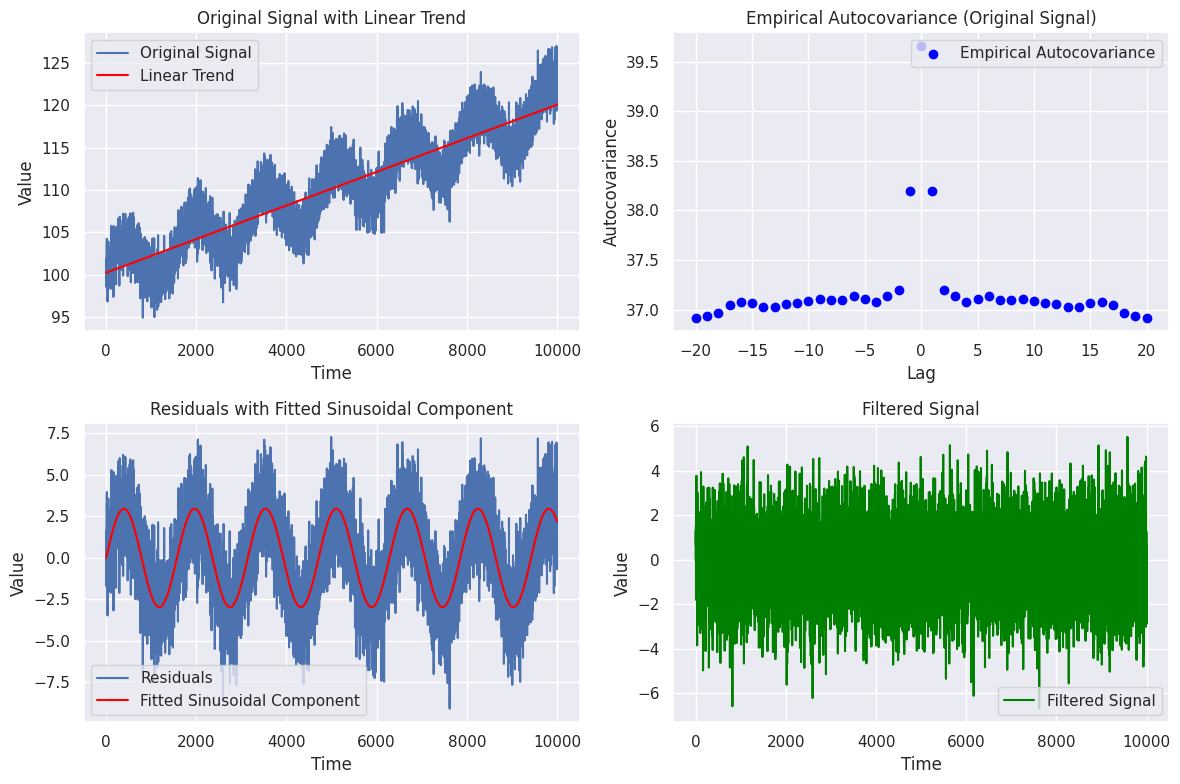

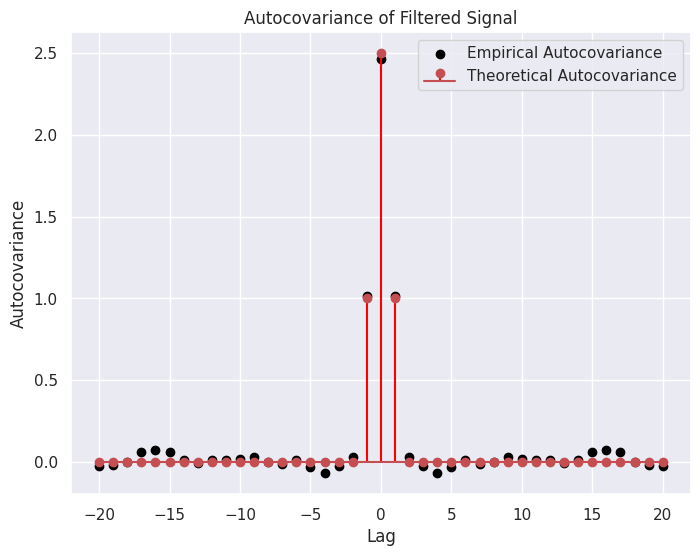

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from scipy.optimize import curve_fit
from src.functions import empirical_autocovariance

sns.set()


def theoretical_autocovariance(h, sigma_z, theta):
    """Calculate theoretical autocovariance."""
    if h == 0:
        return sigma_z**2 * (1 + theta**2)
    elif abs(h) == 1:
        return sigma_z**2 * theta
    else:
        return 0


def linear_trend(t, a, b):
    """Linear trend function."""
    return a * t + b


def sinusoidal_fit_function(t, c, d):
    """Sinusoidal component function."""
    return c * np.sin(d * t)


# Parameters
mu = 0
sigma_z = np.sqrt(2)
theta = 0.5
a = 0.002
b = 100
c = 3
d = 0.004
n = 10000

# Generate data
z_t = np.random.normal(mu, sigma_z, n + 1)
y_t = np.array([z_t[i] + theta * z_t[i - 1] for i in range(1, n + 1)])
time_series = np.arange(1, n + 1)

# Generate signal with trend and sinusoidal component
x_t = linear_trend(time_series, a, b) + sinusoidal_fit_function(time_series, c, d) + y_t

# Calculate residuals after removing linear trend
linear_coeffs = np.polyfit(time_series, x_t, 1)
linear_fit = linear_coeffs[0] * time_series + linear_coeffs[1]
residuals = x_t - linear_fit

# Fit sinusoidal component to residuals
popt, _ = curve_fit(
    sinusoidal_fit_function, time_series, residuals, bounds=([2, 0.003], [5, 0.005])
)
filtered_signal = residuals - sinusoidal_fit_function(time_series, *popt)

# Print fitted parameters
print(f"Fitted parameters for sinusoidal component: {popt}")

# Plot results
fig, axs = plt.subplots(2, 2, figsize=(12, 8))

# Original signal and linear trend
axs[0, 0].plot(time_series, x_t, label="Original Signal")
axs[0, 0].plot(time_series, linear_fit, label="Linear Trend", color="red")
axs[0, 0].set_title("Original Signal with Linear Trend")
axs[0, 0].set_xlabel("Time")
axs[0, 0].set_ylabel("Value")
axs[0, 0].legend()
axs[0, 0].grid(True)

# Empirical autocovariance of the original signal
lags = np.arange(-20, 21)
empirical_ac = [empirical_autocovariance(x_t, lag) for lag in lags]
axs[0, 1].scatter(lags, empirical_ac, label="Empirical Autocovariance", color="blue")
axs[0, 1].set_title("Empirical Autocovariance (Original Signal)")
axs[0, 1].set_xlabel("Lag")
axs[0, 1].set_ylabel("Autocovariance")
axs[0, 1].legend()
axs[0, 1].grid(True)

# Residuals and fitted sinusoidal component
axs[1, 0].plot(time_series, residuals, label="Residuals")
axs[1, 0].plot(
    time_series,
    sinusoidal_fit_function(time_series, *popt),
    label="Fitted Sinusoidal Component",
    color="red",
)
axs[1, 0].set_title("Residuals with Fitted Sinusoidal Component")
axs[1, 0].set_xlabel("Time")
axs[1, 0].set_ylabel("Value")
axs[1, 0].legend()
axs[1, 0].grid(True)

# Filtered signal
axs[1, 1].plot(time_series, filtered_signal, label="Filtered Signal", color="green")
axs[1, 1].set_title("Filtered Signal")
axs[1, 1].set_xlabel("Time")
axs[1, 1].set_ylabel("Value")
axs[1, 1].legend()
axs[1, 1].grid(True)

plt.tight_layout()
plt.show()

# Plot theoretical and empirical autocovariance of the filtered signal
plt.figure(figsize=(8, 6))
empirical_ac_filtered = [empirical_autocovariance(filtered_signal, lag) for lag in lags]
theoretical_ac = [theoretical_autocovariance(lag, sigma_z, theta) for lag in lags]
plt.scatter(
    lags, empirical_ac_filtered, color="black", label="Empirical Autocovariance"
)
plt.stem(
    lags,
    theoretical_ac,
    linefmt="red",
    markerfmt="ro",
    label="Theoretical Autocovariance",
)
plt.title("Autocovariance of Filtered Signal")
plt.xlabel("Lag")
plt.ylabel("Autocovariance")
plt.legend()
plt.grid(True)
plt.show()